In [54]:
import matplotlib.pyplot as plt
import geopandas as gpd

al = geopandas.read_file(r"C:\Users\be81h\Documents\408_cel\homework_2\cb_2024_01_bg_500k\cb_2024_01_bg_500k.shp")

<Axes: >

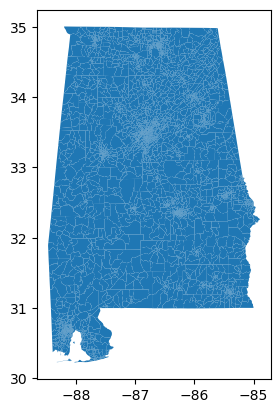

In [55]:
al.plot()

In [56]:
print(al)

     STATEFP COUNTYFP TRACTCE BLKGRPCE                GEOIDFQ         GEOID  \
0         01      115  040107        2  1500000US011150401072  011150401072   
1         01      125  012306        3  1500000US011250123063  011250123063   
2         01      051  030801        2  1500000US010510308012  010510308012   
3         01      077  011504        2  1500000US010770115042  010770115042   
4         01      113  030500        2  1500000US011130305002  011130305002   
...      ...      ...     ...      ...                    ...           ...   
3919      01      103  005704        2  1500000US011030057042  011030057042   
3920      01      015  001802        1  1500000US010150018021  010150018021   
3921      01      101  005414        1  1500000US011010054141  011010054141   
3922      01      097  006802        1  1500000US010970068021  010970068021   
3923      01      073  005800        2  1500000US010730058002  010730058002   

     NAME       NAMELSAD LSAD     ALAND   AWATER  \

In [57]:


al = al.to_crs(epsg=3857)


In [59]:
# Calculate area and perimeter
al['area'] = al.geometry.area
al['perimeter'] = al.geometry.length

# Calculate Circularity Ratio: 4 * pi * Area / Perimeter^2
al['circularity'] = (4 * 3.14159 * al['area']) / (al['perimeter'] ** 2)

# Filter for circles (e.g., circularity > 0.85)
circular_shapes = al[al['circularity'] > 0.85]
print(circular_shapes)

    STATEFP COUNTYFP TRACTCE BLKGRPCE                GEOIDFQ         GEOID  \
118      01      069  040600        3  1500000US010690406003  010690406003   
269      01      109  189001        1  1500000US011091890011  011091890011   

    NAME       NAMELSAD LSAD     ALAND  AWATER  \
118    3  Block Group 3   BG    697890       0   
269    1  Block Group 1   BG  14641028       0   

                                              geometry          area  \
118  POLYGON ((-9507360.782 3663687.284, -9507213.2...  9.732454e+05   
269  POLYGON ((-9576770.519 3735109.111, -9576727.6...  2.029380e+07   

        perimeter  circularity  
118   3781.719940     0.855171  
269  17012.641324     0.881108  


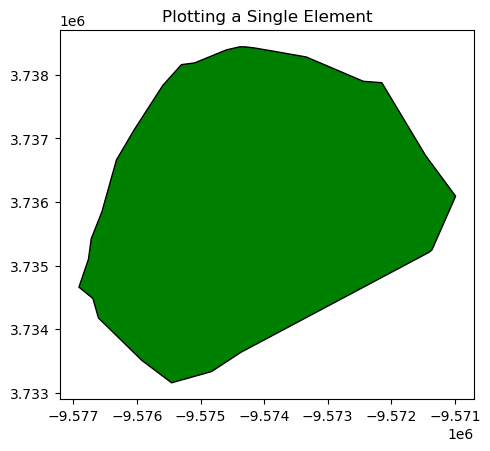

In [ ]:
# 2. Select a specific row (e.g., the first row, index 0)
single_element = al.iloc[[269]] 

# 3. Plot the specific element
fig, ax = plt.subplots()
single_element.plot(ax=ax, color='green', edgecolor='black')

# Add context (optional: plot all shapes underneath in light grey)
# gdf.plot(ax=ax, color='lightgrey', edgecolor='white')

plt.title("City with circular boundary")
plt.show()